## **Caso Práctico 1: Segmentación de Clientes Basado en Información de Ventas**
El documento corresponde a un caso práctico que puede ser utilizado como guía para segmentar clientes al aplicar PCA como técnica de reducción dimensional.

### **Contexto empresarial**

Los registros históricos de ventas son una fuente importante de información para la creación de segmentos de clientes que permitan estrategias de ventas focalizadas. Los datos utilizados en este caso de uso provienen del registro de ventas de una empresa de retail. El objetivo es crear segmentos de clientes utilizando la metodología RFM en función de tres criterios clave: recencia, frecuencia y monto. Recencia se refiere a cuánto tiempo ha pasado desde la última compra de un cliente; cuanto más reciente haya sido, mayor será la puntuación de recencia. Frecuencia mide cuántas veces un cliente ha realizado compras durante un período específico; los clientes que compran con más frecuencia tienen una puntuación de frecuencia más alta. Monto se refiere al valor total de las compras realizadas por un cliente en el mismo período; los clientes que gastan más tienen una puntuación de monto más alta. Este análisis ayuda a las empresas a identificar a sus clientes más valiosos, diseñar estrategias de marketing personalizadas y mejorar la fidelidad y satisfacción del cliente.

### **Descripción de los datos**

Los datos corresponden a 21 variables:

- **Row ID**: identificador unico por registro.
- **Order ID**: identificador unico por orden.
- **Order Date**: fecha de la venta.
- **Ship Date**: fecha de envío.
- **Ship Mode**: metodo de envío.
- **Customer ID**: identificador único por cliente.
- **Customer Name**: nombre del cliente.
- **Segment**: segmento en el cual se registro el cliente.
- **Country**: país de residencia del cliente.
- **City**: ciudad de residencia del cliente.
- **State**: estado de residencia del cliente.
- **Postal Cod**: código postal del cliente.
- **Region**: región de residencia del cliente.
- **Product ID**: identificador único del producto.
- **Category**: categoria del producto.
- **Sub-Category**: sub-categoria del producto.
- **Product Name**: nombre el producto.
- **Sales**: valor total de la venta.
- **Quantity**: cantidad ordenada de producto.
- **Discount**: descuento aplicado.
- **Profit**: ganacia generadas por la venta.

## **1. Configuración Inicial y Carga de Datos**
Primero, configuraremos nuestro entorno de análisis e importaremos las bibliotecas necesarias.

In [18]:
# Importar librerias
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import plotly.express as px
import os

In [19]:
# Carga de datos
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
df = pd.read_csv(path + "/" + os.listdir(path)[0], encoding='latin1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


## **2. Análisis Inicial**
Analizaremos la información inherente al dataset para entender:
- Tipos de datos
- Valores faltantes
- Número único de clientes

In [20]:
# Tipos de datos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
# Número unico de clientes
print("Número unico de clientes:", df['Customer ID'].nunique())

Número unico de clientes: 793


#### **Insights relevantes**
- No existen datos faltantes.
- Existen 793 clientes únicos para los cuales crearemos segmentos basados en el RFM.

## **3. Cálculo de Variables para RFM**
### **3.1. Recencia, Frecuencia y Monto**
- La recencia es el tiempo en dias (puede ser meses dependiendo del caso de uso) entre una fecha de referencia (en este caso fecha actual) y la fecha de la venta.
- La frecuencia corresponde a la columna "Quantity".
- El monto corresponde a la columna "Sales"

In [22]:
# Cálculo de la recencia
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Fecha mínima y máxima
print("Fecha mínima:", df["Order Date"].min())
print("Fecha máxima:", df["Order Date"].max())

Fecha mínima: 2014-01-03 00:00:00
Fecha máxima: 2017-12-30 00:00:00


In [50]:
# Cálculo de frecuencia y monto
df['Recencia'] = (df["Order Date"].max() - df['Order Date']).dt.days
df["Frecuencia"] = df["Quantity"]
df["Monto"] = df["Sales"]
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recencia,Frecuencia,Monto
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,417,2,261.96
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,417,3,731.94


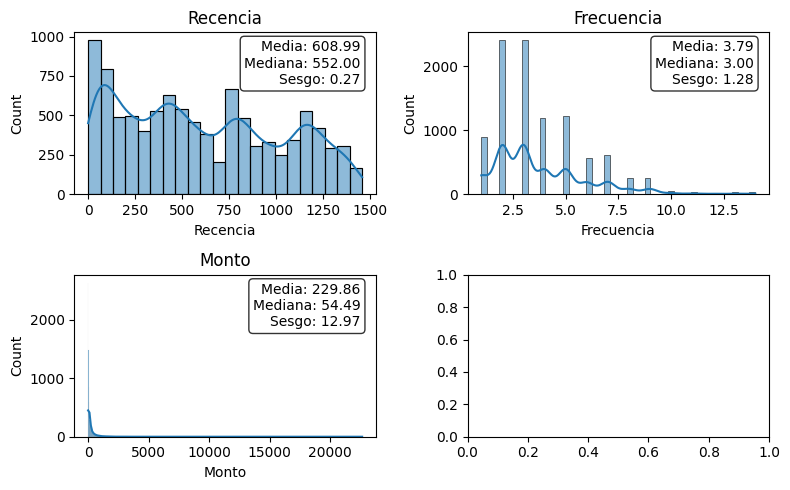

In [51]:
# Visualización variables numéricas
def visualize_numeric_variables(df, numeric_cols):
    """Visualización de distribuciones"""
    fig, axes = plt.subplots(len(numeric_cols)//2 + len(numeric_cols)%2, 2,
                             figsize=(8, 3.5*len(numeric_cols)//2))
    axes = axes.ravel()

    for idx, col in enumerate(numeric_cols):
        # Histograma con KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'{col}')

        # Añadir estadísticas relevantes
        stats_text = f'Media: {df[col].mean():.2f}\n'
        stats_text += f'Mediana: {df[col].median():.2f}\n'
        stats_text += f'Sesgo: {df[col].skew():.2f}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

visualize_numeric_variables(df, numeric_cols=["Recencia", "Frecuencia", "Monto"])

La imagen muestra cuatro histogramas que representan la distribución de tres variables: Recencia, Frecuencia y Monto. El cuarto gráfico aparece vacío y sin datos.

**Recencia**

- Distribución relativamente uniforme entre 250 y 1250
- Media: 608.99
- Mediana: 552.00
- Sesgo positivo ligero (0.27), indicando una distribución casi simétrica

**Frecuencia**

- Distribución con mayor concentración en valores bajos (entre 2 y 5)
- Media: 3.79
- Mediana: 3.00
- Sesgo positivo moderado (1.28), lo que indica una cola larga hacia valores altos

**Monto**

- Distribución extremadamente sesgada hacia valores pequeños
- La mayoría de las observaciones están cerca de cero
- Media: 229.86
- Mediana: 54.49
- Sesgo muy alto (12.97), lo que indica una gran disparidad entre valores típicos y extremos

**Insights relevantes**

- Comportamiento de clientes: estos datos sugieren un patrón típico de una base de clientes donde:

  - La mayoría realiza compras con frecuencia baja a moderada (2-5 veces)
  - Los montos de compra son generalmente pequeños, con muy pocos clientes realizando compras de gran valor.
  - La recencia muestra que hay una distribución equilibrada de clientes recientes y menos recientes.

- Segmentación potencial

  - Existe un pequeño segmento de clientes que realizan compras con mayor frecuencia (valores > 5).
  - Hay un grupo muy pequeño pero significativo que genera montos de compra extremadamente altos (outliers).

- Estrategia de marketing

  - La alta asimetría en el monto sugiere una oportunidad para estrategias diferenciadas: promociones generales para la mayoría y atención personalizada para los pocos clientes de alto valor.
  - La distribución de recencia indica que hay una buena representación de clientes activos, lo que facilita campañas de retención.

- Oportunidad de análisis RFM (Recencia, Frecuencia, Monto)

  - Estos tres indicadores son precisamente los que se utilizan en el análisis RFM para segmentación de clientes.
  - La combinación de estas tres variables permitiría identificar segmentos como "clientes fieles", "clientes en riesgo de abandono" o "clientes de alto potencial".

### **3.3. Agrupamiento por Cliente**
Dado que el RFM debe ser calculado por cliente, se procede a realizar un agrupamiento por cada ID único de cliente. Se toma el valor mínimo de recencia por cliente dado que corresponderia a los dias respecto a la última fecha de venta. Para frecuencia y monto se realiza una suma para conocer el valor toal de los mismos por cliente.

In [53]:
# Agrupamiento por cliente
df_group = df.groupby("Customer ID").agg(
    Recencia=('Recencia', 'min'),
    Frecuencia=('Frecuencia', 'sum'),
    Monto=('Monto', 'sum')
).reset_index()

df_group.head()

,Customer ID,Recencia,Frecuencia,Monto
0,AA-10315,184,30,5563.560
1,AA-10375,19,41,1056.390
2,AA-10480,259,36,1790.512
3,AA-10645,55,64,5086.935
4,AB-10015,415,13,886.156


## **4. Cálculo del RFM**
### **4.1. Reducción Dimensional**

**Método clásico**

La metodología general sugiere asignar puntuaciones a cada cliente calculando quintiles y asignando a cada quintil una puntuación en escala de 1 a 5.Finalmente se suman estas puntuaciones para obtener el valor final de RFM.

**Método basado en Análisis de Componentes Principales (PCA)**

En este caso se aplica una reducción de tres a dos dimensiones utilizando PCA. En caso de que el primer componente principal explique al menos 70% de la varianza, se toma dicho componente, se realiza una transformación (generalmente a valores entre 0 y 100), y este valor finalmente corresponde al valor del RFM.  

In [54]:
def perform_pca(data, n_components=None):
    """
    Realiza PCA sobre los datos
    """
    #
    # Crear pipeline con escalado y PCA
    pca_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components))
    ])

    # Ajustar y transformar los datos
    X_pca = pca_pipeline.fit_transform(X)

    # Obtener componentes
    pca = pca_pipeline.named_steps['pca']

    return X_pca, pca

# Realizar PCA
X = df_group[["Recencia", "Frecuencia", "Monto"]]
X_pca, pca = perform_pca(X)

Varianza explicada primer componente: 55.86%


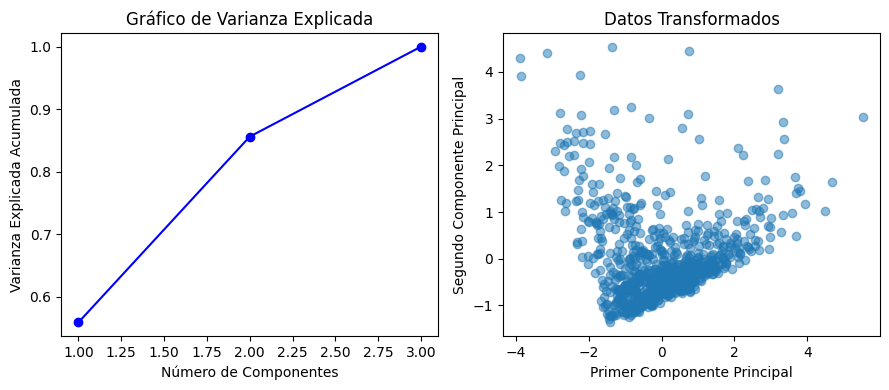

In [55]:
def evaluate_pca(X, pca):
    X_transformed = pca.fit_transform(X)

    # Calcular varianza explicada
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Varianza explicada primer componente: {explained_variance_ratio[0] * 100 :.2f}%")

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))

    # Scree plot
    n_components = len(explained_variance_ratio)
    axes[0].plot(range(1, n_components + 1),
                 np.cumsum(explained_variance_ratio), 'bo-')
    axes[0].set_xlabel('Número de Componentes')
    axes[0].set_ylabel('Varianza Explicada Acumulada')
    axes[0].set_title('Gráfico de Varianza Explicada')

    # Datos transformados
    if X_transformed.shape[1] >= 2:
        scatter = axes[1].scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5)
        axes[1].set_xlabel('Primer Componente Principal')
        axes[1].set_ylabel('Segundo Componente Principal')
        axes[1].set_title('Datos Transformados')

    plt.tight_layout()
    plt.show()

    return pca, X_transformed

# Aplicar PCA a nuestros datos preparados
pca, X_pca = evaluate_pca(X_pca, pca)

La imagen muestra un análisis de componentes principales (PCA).


**Gráfico de Varianza Explicada (izquierda):** muestra la relación entre el número de componentes principales y la varianza explicada acumulada. Con 1 componente, se explica aproximadamente el 56% de la varianza. Con 2 componentes, se explica aproximadamente el 86% de la varianza. Con 3 componentes, se alcanza prácticamente el 100% de la varianza explicada.

**Datos Transformados (derecha):** rRepresenta la proyección de los datos en el espacio de los dos primeros componentes principales. Los puntos muestran una distribución no lineal, con forma de curva o parábola. Hay mayor densidad de datos en la región inferior (valores negativos del segundo componente). Existen algunos valores atípicos o outliers, especialmente en la parte superior del gráfico.

**Insights relevantes**

- Reducción efectiva de dimensionalidad

  - Con solo 2 componentes se captura el 86% de la información original, lo que indica una reducción eficiente de dimensiones.
  - El tercer componente aporta aproximadamente un 14% adicional de varianza explicada, completando el análisis.

- Estructura no lineal de los datos

  - La distribución en forma curva en el espacio de los dos primeros componentes sugiere que la relación entre las variables originales es no lineal.
  - Esto indica que técnicas lineales podrían no ser óptimas para modelar estos datos; métodos no lineales como kernel PCA, t-SNE o UMAP podrían ser más apropiados.

- Posibles grupos o clusters

  - Se observa cierta estructura en los datos transformados que podría indicar la presencia de grupos naturales.
  - La concentración de puntos en la parte inferior del gráfico sugiere un grupo principal, mientras que los puntos más dispersos en la parte superior podrían representar subpoblaciones distintas.

- Decisión sobre componentes a utilizar

  - El gráfico de la izquierda justifica claramente el uso de al menos 2 componentes para análisis posteriores.
  - El tercer componente podría ser necesario si se requiere una representación extremadamente precisa de los datos originales.

- Potenciales outliers

  - Los puntos alejados en la parte superior del gráfico (segundo componente > 3) merecen un análisis específico, ya que podrían representar casos atípicos o de especial interés.

### **4.2. Cálculo del RFM**
Aplicamos PCA a todos los clientes, tomamos el primer componente principal, y escalamos a valores entre 0 y 100.

In [56]:
# Realizar PCA
X = df_group[["Recencia", "Frecuencia", "Monto"]]
X_pca, pca = perform_pca(X)

# Para el RFM tomamos el primer componente principal
scaler = MinMaxScaler(feature_range=(0, 100))
df_group["RFM"] = X_pca[:, 0]
df_group["RFM"] = scaler.fit_transform(df_group[["RFM"]])
df_group.head()

,Customer ID,Recencia,Frecuencia,Monto,RFM
0,AA-10315,184,30,5563.560,42.131434
1,AA-10375,19,41,1056.390,37.471600
2,AA-10480,259,36,1790.512,32.526845
3,AA-10645,55,64,5086.935,53.557802
4,AB-10015,415,13,886.156,20.119540


In [57]:
# Valores mínimo y máximo de RFM
print("RFM mínimo:", df_group["RFM"].min())
print("RFM máximo:", df_group["RFM"].max())

RFM mínimo: 0.0
RFM máximo: 100.0


### **4.3. Creación de Segmentos**
Una vez calculado el indicador RFM se pueden crear segmentos aplicando (entre otras) algunas de las siguientes estrategias:
- Utilizando rangos arbitrarios de RFM
- Utilizando cuantiles (deciles, quintiles, cuartiles, etc.)

#### **4.3.1. Asignación por Cuantiles**
En este caso crearemos tres segmentos basados en los terciles del RFM:
- Tercil 1 (T1): "Alto Valor"
- Tercil 2 (T2): "Medio Valor"
- Tercil 3 (T3): "Bajo Valor"

In [58]:
# Asignar segmento basado en RFM calculado via PCA
df_group["Segmento PCA"] = pd.qcut(
    df_group["RFM"],
    q=3,
    labels=["Bajo Valor", "Medio Valor", "Alto Valor"]
)

df_group.head()

,Customer ID,Recencia,Frecuencia,Monto,RFM,Segmento PCA
0,AA-10315,184,30,5563.560,42.131434,Medio Valor
1,AA-10375,19,41,1056.390,37.471600,Medio Valor
2,AA-10480,259,36,1790.512,32.526845,Bajo Valor
3,AA-10645,55,64,5086.935,53.557802,Alto Valor
4,AB-10015,415,13,886.156,20.119540,Bajo Valor


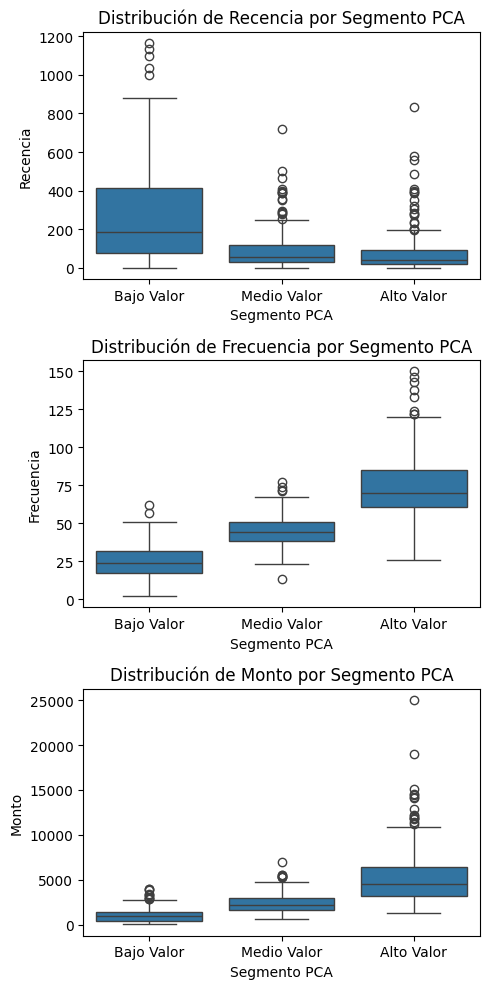

In [59]:
def boxplot_segment(data):
    # Crear subplots para cada variable
    fig, axes = plt.subplots(3, 1, figsize=(5, 10))

    # Gráfico de distribución de Recencia
    sns.boxplot(x='Segmento PCA', y='Recencia', data=data, ax=axes[0])
    axes[0].set_title('Distribución de Recencia por Segmento PCA')
    axes[0].set_xlabel('Segmento PCA')
    axes[0].set_ylabel('Recencia')

    # Gráfico de distribución de Frecuencia
    sns.boxplot(x='Segmento PCA', y='Frecuencia', data=data, ax=axes[1])
    axes[1].set_title('Distribución de Frecuencia por Segmento PCA')
    axes[1].set_xlabel('Segmento PCA')
    axes[1].set_ylabel('Frecuencia')

    # Gráfico de distribución de Monto
    sns.boxplot(x='Segmento PCA', y='Monto', data=data, ax=axes[2])
    axes[2].set_title('Distribución de Monto por Segmento PCA')
    axes[2].set_xlabel('Segmento PCA')
    axes[2].set_ylabel('Monto')

    plt.tight_layout()
    plt.show()

boxplot_segment(data=df_group)

La imagen presenta tres gráficos de caja (box plots) que muestran la distribución de Recencia, Frecuencia y Monto para tres segmentos de clientes identificados mediante análisis de componentes principales (PCA): Bajo Valor, Medio Valor y Alto Valor.

**Distribución de Recencia por Segmento PCA (superior):** el segmento de Bajo Valor muestra valores de recencia más altos (mediana 200). Los segmentos de Medio y Alto Valor presentan valores de recencia más bajos (100 y 75, respectivamente). El segmento de Bajo Valor tiene mayor dispersión y varios valores atípicos que llegan hasta 1200.

**Distribución de Frecuencia por Segmento PCA (medio):** clara tendencia ascendente desde Bajo Valor hacia Alto Valor. Bajo Valor: mediana 25. Medio Valor: mediana 45. Alto Valor: mediana 75. El segmento de Alto Valor presenta varios valores atípicos por encima de 125.

**Distribución de Monto por Segmento PCA (inferior):** marcada diferencia entre segmentos. Bajo Valor: mediana 1000. Medio Valor: mediana 2500. Alto Valor: mediana 5000. El segmento de Alto Valor muestra valores atípicos extremos cercanos a 25,000.

**Insights relevantes:**

- Interpretación del valor de recencia

  - Los valores más bajos de recencia indican compras más recientes
  - Los clientes de Alto y Medio Valor tienen compras más recientes que los de Bajo Valor.
  - Esto sugiere que la actividad reciente es un fuerte predictor del valor del cliente.

- Segmentación efectiva

  - El PCA ha logrado una clara diferenciación entre segmentos, especialmente en Frecuencia y Monto.
  - La separación más significativa se observa en el Monto, donde hay una progresión notable desde Bajo hasta Alto Valor.

- Valor extremo en el segmento Alto Valor

  - Los valores atípicos en el segmento de Alto Valor representan clientes "supervalor" que podrían justificar un tratamiento especial.
  - Particularmente, hay clientes que gastan hasta 5 veces más que la mediana de su propio segmento.

- Estrategia de marketing diferenciada

  - Para el segmento de Bajo Valor: estrategias de reactivación, ya que son los menos recientes.
  - Para el segmento de Medio Valor: estrategias de incremento de frecuencia y monto.
  - Para el segmento de Alto Valor: estrategias de retención y programas de fidelidad VIP.

- Validación del modelo RFM

  - Los resultados confirman la efectividad del análisis RFM (Recencia, Frecuencia, Monto) para segmentación.
  - El PCA ha captado adecuadamente estas tres dimensiones para crear segmentos con comportamientos diferenciados.

- Oportunidad de microsegmentación

  - Dentro del segmento de Alto Valor, la presencia de valores atípicos sugiere la posibilidad de crear un sub-segmento "Premium" con estrategias personalizadas.

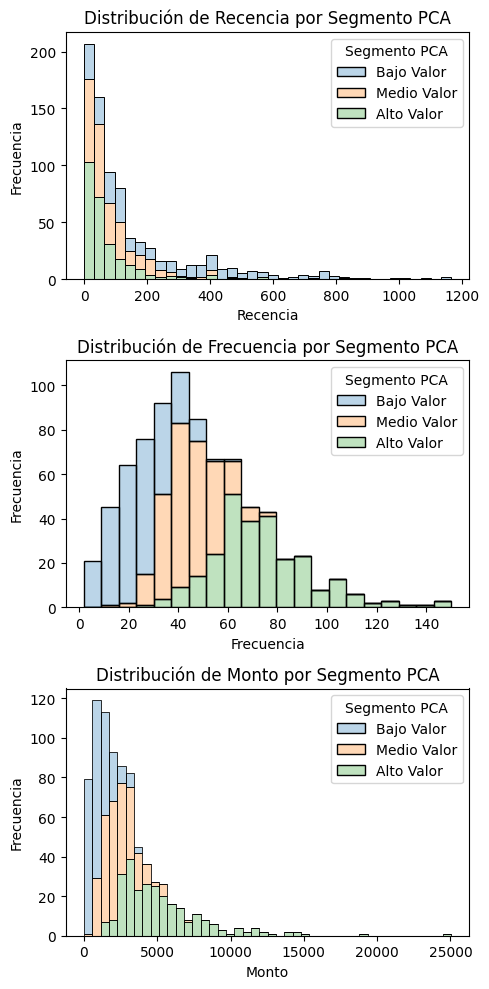

In [60]:
def histplot_segment(data):
    # Crear subplots para cada métrica
    fig, axes = plt.subplots(3, 1, figsize=(5, 10))

    # Gráfico de distribución de Recencia
    sns.histplot(data=data, x='Recencia', hue='Segmento PCA', multiple='stack', kde=False, ax=axes[0], alpha=0.3)
    axes[0].set_title('Distribución de Recencia por Segmento PCA')
    axes[0].set_xlabel('Recencia')
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de distribución de Frecuencia
    sns.histplot(data=data, x='Frecuencia', hue='Segmento PCA', multiple='stack', kde=False, ax=axes[1], alpha=0.3)
    axes[1].set_title('Distribución de Frecuencia por Segmento PCA')
    axes[1].set_xlabel('Frecuencia')
    axes[1].set_ylabel('Frecuencia')

    # Gráfico de distribución de Monto
    sns.histplot(data=data, x='Monto', hue='Segmento PCA', multiple='stack', kde=False, ax=axes[2], alpha=0.3)
    axes[2].set_title('Distribución de Monto por Segmento PCA')
    axes[2].set_xlabel('Monto')
    axes[2].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

histplot_segment(df_group)

La imagen muestra tres histogramas que representan la distribución de Recencia, Frecuencia y Monto para tres segmentos de clientes identificados mediante análisis de componentes principales (PCA): Bajo Valor, Medio Valor y Alto Valor.

**Distribución de Recencia por Segmento PCA (superior):** todos los segmentos muestran una mayor concentración en valores bajos (0-200). El segmento de Bajo Valor tiene mayor proporción de valores altos de recencia (400+). Los segmentos de Medio y Alto Valor están más concentrados en valores bajos de recencia.

**Distribución de Frecuencia por Segmento PCA (medio):** segmento de Bajo Valor: concentrado en frecuencias entre 10-40. Segmento de Medio Valor: concentrado en frecuencias entre 30-70. Segmento de Alto Valor: valores más distribuidos entre 40-100+. Solo el segmento de Alto Valor alcanza frecuencias superiores a 100.

**Distribución de Monto por Segmento PCA (inferior):** segmento de Bajo Valor: altamente concentrado en montos bajos (0-2000). Segmento de Medio Valor: principalmente entre 1000-5000. Segmento de Alto Valor: más disperso, con presencia significativa en rangos 2000-10000. Solo el segmento de Alto Valor muestra valores extremos superiores a 10000.

**Insights relevantes**

- Patrones de comportamiento claramente diferenciados

  - El segmento de Alto Valor tiene compras más recientes (recencia baja), con mayor frecuencia y montos significativamente mayores.
  - El segmento de Bajo Valor muestra el comportamiento opuesto: compras menos recientes, baja frecuencia y montos pequeños.
  - Esto confirma la efectividad de la segmentación mediante PCA.

- Recordatorio sobre interpretación de recencia

  - Valores más bajos de recencia indican compras más recientes.
  - La mayor concentración de clientes de Alto Valor en valores bajos de recencia confirma que son clientes más activos actualmente.

- Solapamiento y oportunidades de migración

  - Existe cierto solapamiento entre segmentos, especialmente entre Medio y Alto Valor.
  - Esto sugiere oportunidades para "migrar" clientes de un segmento a otro mediante estrategias dirigidas.

- Distribución de cola larga en Alto Valor

  - El segmento de Alto Valor muestra una distribución de cola larga, especialmente en Monto y Frecuencia.
  - Esto indica la presencia de "super clientes" dentro del segmento que merecen atención especial.

- Estrategias de marketing recomendadas

  - Para Bajo Valor: programas de reactivación con incentivos para compras más frecuentes.
  - Para Medio Valor: estrategias de aumento de ticket promedio y beneficios por frecuencia.
  - Para Alto Valor: programa de fidelización premium con reconocimiento de estatus y servicios exclusivos.

- Optimización de inversión en marketing

  - La clara separación en valor económico justifica una inversión diferenciada por segmento.
  - Los recursos de marketing deberían asignarse proporcionalmente al potencial de cada segmento.

- Evaluación del ciclo de vida del cliente:

  - La correlación entre recencia y valor del cliente sugiere que algunos clientes de Bajo Valor podrían estar en proceso de abandono.
  - Se recomienda implementar señales de alerta temprana basadas en cambios en el patrón de recencia.

#### **4.3.2. Asignación por Cuantiles como Límites**
En este caso crearemos tres segmentos basados en limites definidos por los valores de dos percentiles:
- Mayor igual al percentil 90 (P90): "Alto Valor"
- Entre percentil 90 (P90) y 50 (P50): "Medio Valor"
- Menor a percentil 90 (P50): "Bajo Valor"

In [61]:
# Definir los percentiles
percentile_90 = df_group['RFM'].quantile(0.90)
percentile_50 = df_group['RFM'].quantile(0.50)

# Función para asignar el segmento
def asignar_segmento(value):
    if value >= percentile_90:
        return 'Alto Valor'
    elif value < percentile_50:
        return 'Bajo Valor'
    else:
        return 'Medio Valor'

# Crear la nueva columna de segmentos
df_group['Segmento PCA'] = df_group['RFM'].apply(asignar_segmento)
df_group = df_group.sort_values('RFM')
df_group.head()

,Customer ID,Recencia,Frecuencia,Monto,RFM,Segmento PCA
552,NB-18580,1165,7,273.872,0.000000,Bajo Valor
637,RE-19405,1097,5,48.360,0.376611,Bajo Valor
309,GR-14560,1135,23,1284.380,7.843254,Bajo Valor
374,JJ-15760,753,11,195.000,10.193154,Bajo Valor
585,PB-19210,688,10,132.738,11.206318,Bajo Valor


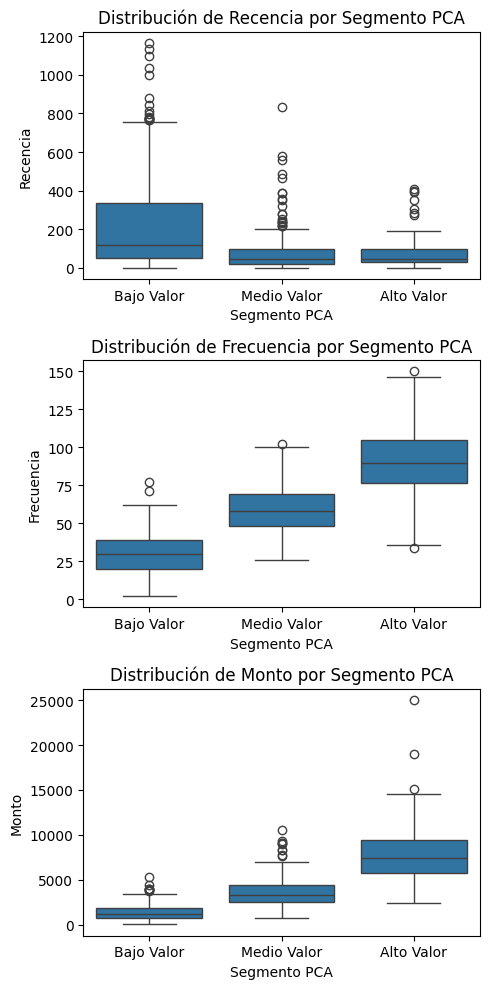

In [62]:
boxplot_segment(data=df_group)

La imagen presenta tres gráficos de caja (box plots) que muestran la distribución de Recencia, Frecuencia y Monto para tres segmentos de clientes identificados mediante análisis de componentes principales (PCA): Bajo Valor, Medio Valor y Alto Valor.

**Distribución de Recencia por Segmento PCA (superior):** el segmento de Bajo Valor muestra valores de recencia más altos (mediana 150). Los segmentos de Medio y Alto Valor presentan valores de recencia más bajos (75 y 50, respectivamente). El segmento de Bajo Valor tiene mayor dispersión y varios valores atípicos.

**Distribución de Frecuencia por Segmento PCA (medio):** clara tendencia ascendente desde Bajo Valor hacia Alto Valor. Bajo Valor: mediana 25. Medio Valor: mediana 60. Alto Valor: mediana 90. El segmento de Alto Valor presenta varios valores atípicos por encima de 150.

**Distribución de Monto por Segmento PCA (inferior):** marcada diferencia entre segmentos. Bajo Valor: mediana 1500. Medio Valor: mediana 4000. Alto Valor: mediana 7500. El segmento de Alto Valor muestra valores atípicos extremos cercanos a 25,000.

**Insights relevantes:**

- Interpretación del valor de recencia

  - Los valores más bajos de recencia indican compras más recientes
  - Los clientes de Alto y Medio Valor tienen compras más recientes que los de Bajo Valor.
  - Esto sugiere que la actividad reciente es un fuerte predictor del valor del cliente.

- Segmentación efectiva

  - El PCA ha logrado una clara diferenciación entre segmentos, especialmente en Frecuencia y Monto.
  - La separación más significativa se observa en el Monto, donde hay una progresión notable desde Bajo hasta Alto Valor.

- Valor extremo en el segmento Alto Valor

  - Los valores atípicos en el segmento de Alto Valor representan clientes "supervalor" que podrían justificar un tratamiento especial.
  - Particularmente, hay clientes que gastan hasta 5 veces más que la mediana de su propio segmento.

- Estrategia de marketing diferenciada

  - Para el segmento de Bajo Valor: estrategias de reactivación, ya que son los menos recientes.
  - Para el segmento de Medio Valor: estrategias de incremento de frecuencia y monto.
  - Para el segmento de Alto Valor: estrategias de retención y programas de fidelidad VIP.

- Correlación entre las variables RFM

  - Se observa una clara correlación inversa entre recencia y frecuencia/monto.
  - Los clientes más frecuentes y con mayor gasto también son los que han comprado más recientemente.
  - Esto refuerza la validez del modelo RFM (Recencia, Frecuencia, Monto) como base para segmentación.

- Oportunidad de microsegmentación

  - Dentro del segmento de Alto Valor, la presencia de valores atípicos sugiere la posibilidad de crear un sub-segmento "Premium" con estrategias ultrapersonalizadas.
  - Los clientes con montos superiores a 15,000 podrían representar menos del 5% del total pero generar un impacto desproporcionado en los ingresos.

- Gestión del ciclo de vida del cliente

  - Los datos sugieren que mantener a los clientes activos (baja recencia) es clave para maximizar su valor.
  - Una estrategia proactiva para reducir la recencia en el segmento de Bajo Valor podría transformar significativamente su perfil de valor.

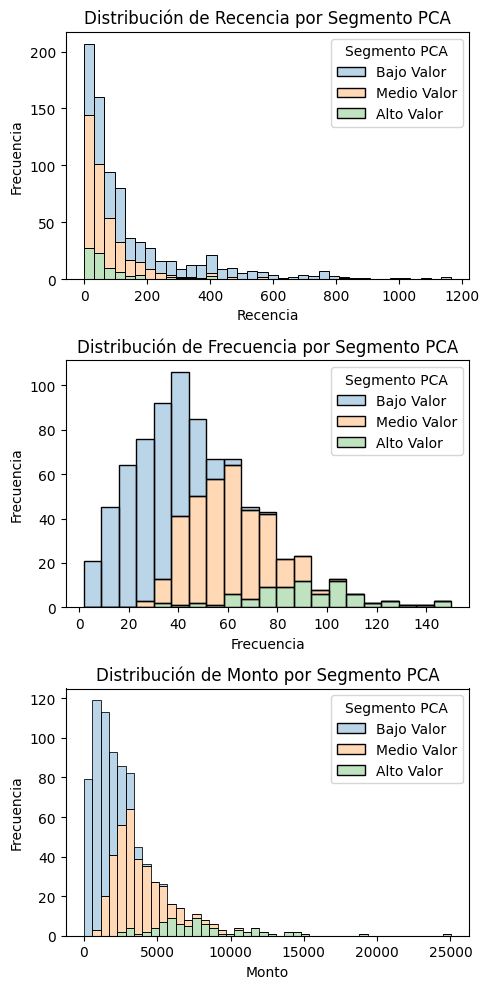

In [63]:
histplot_segment(data=df_group)

La imagen muestra tres histogramas que representan la distribución de Recencia, Frecuencia y Monto para tres segmentos de clientes identificados mediante análisis de componentes principales (PCA): Bajo Valor, Medio Valor y Alto Valor.

**Distribución de Recencia por Segmento PCA (superior):** todos los segmentos muestran una mayor concentración en valores bajos (0-200). El segmento de Bajo Valor tiene mayor proporción de valores altos de recencia (400+). Los segmentos de Medio y Alto Valor están más concentrados en valores bajos de recencia.

**Distribución de Frecuencia por Segmento PCA (medio):** segmento de Bajo Valor: concentrado en frecuencias entre 10-40. Segmento de Medio Valor: concentrado en frecuencias entre 30-70. Segmento de Alto Valor: valores más distribuidos entre 40-100+. Solo el segmento de Alto Valor alcanza frecuencias superiores a 100.

**Distribución de Monto por Segmento PCA (inferior):** segmento de Bajo Valor: altamente concentrado en montos bajos (0-2000). Segmento de Medio Valor: principalmente entre 1000-5000. Segmento de Alto Valor: más disperso, con presencia significativa en rangos 2000-10000. Solo el segmento de Alto Valor muestra valores extremos superiores a 10000.

**Insights relevantes**

- Patrones de comportamiento claramente diferenciados

  - El segmento de Alto Valor tiene compras más recientes (recencia baja), con mayor frecuencia y montos significativamente mayores.
  - El segmento de Bajo Valor muestra el comportamiento opuesto: compras menos recientes, baja frecuencia y montos pequeños.
  - Esto confirma la efectividad de la segmentación mediante PCA.

- Recordatorio sobre interpretación de recencia

  - Valores más bajos de recencia indican compras más recientes.
  - La mayor concentración de clientes de Alto Valor en valores bajos de recencia confirma que son clientes más activos actualmente.

- Solapamiento y oportunidades de migración

  - Existe cierto solapamiento entre segmentos, especialmente entre Medio y Alto Valor.
  - Esto sugiere oportunidades para "migrar" clientes de un segmento a otro mediante estrategias dirigidas.

- Distribución de cola larga en Alto Valor

  - El segmento de Alto Valor muestra una distribución de cola larga, especialmente en Monto y Frecuencia.
  - Esto indica la presencia de "super clientes" dentro del segmento que merecen atención especial.

- Estrategias de marketing recomendadas

  - Para Bajo Valor: programas de reactivación con incentivos para compras más frecuentes.
  - Para Medio Valor: estrategias de aumento de ticket promedio y beneficios por frecuencia.
  - Para Alto Valor: programa de fidelización premium con reconocimiento de estatus y servicios exclusivos.

- Optimización de inversión en marketing

  - La clara separación en valor económico justifica una inversión diferenciada por segmento.
  - Los recursos de marketing deberían asignarse proporcionalmente al potencial de cada segmento.

- Evaluación del ciclo de vida del cliente:

  - La correlación entre recencia y valor del cliente sugiere que algunos clientes de Bajo Valor podrían estar en proceso de abandono.
  - Se recomienda implementar señales de alerta temprana basadas en cambios en el patrón de recencia.

## **Caso Práctico 2: Visualización para Clientes E-commerce**
El documento corresponde a un caso práctico que puede ser utilizado como guía para visualizar datos multimensionales de clientes al aplicar PCA o t-SNE como técnica de reducción dimensional.

### **Contexto empresarial**

Este conjunto de datos proporciona una visión completa del comportamiento de los clientes dentro de una plataforma de comercio electrónico. Cada entrada en el conjunto de datos corresponde a un cliente único, ofreciendo un desglose detallado de sus interacciones y transacciones en la plataforma de e-commerce. La información está diseñada para facilitar un análisis y visualización delos datos via reducción dimensional para los niveles de satisfacción.

### **Descripción de los datos**

Los datos corresponden a 11 variables:

- **Customer ID**: identificador unico por cliente.
- **Gender**: género del cliente.
- **Age**: fecha de la venta.
- **City**: fecha de envío.
- **Membership Type**: tipo de membresía del cliente.
- **Total Spend**: monto total gastado en la plataforma.
- **Items Purchased**: número total de items comprados.
- **Average Rating**: calificación promedio de los items comprados.
- **Discount Applied**: si se aplicó descuento.
- **Days Since Last Purchase**: días desde la última compra.
- **Satisfaction Level**: nivel de satisfacción del cliente con la plataforma.

## **1. Configuración Inicial y Carga de Datos**
Primero, configuraremos nuestro entorno de análisis e importaremos las bibliotecas necesarias.

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import kagglehub
import os

In [ ]:
# Descargar y cargar el dataset
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")
df = pd.read_csv(path + "/" + os.listdir(path)[0])

## **2. Análisis Inicial**
Analizaremos la información inherente al dataset para entender:
- Tipos de datos
- Valores faltantes
- Número único de niveles de satisfacción

In [ ]:
# Mostrar información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
# Número unico de clientes
print("Número unico de niveles de satisfación:", df['Satisfaction Level'].nunique())

Número unico de niveles de satisfación: 3


## **3. Preparación y Limpieza de Datos**
En este caso observamos que tenemos variables categóricas que pueden ser relevantes para crear visualizaciones bien definidas. De igual manera la variable "Satisfacton Level" contiene valores faltantes, mismos que procederemos a eliminar dado que son dos registros.

In [ ]:
# Preparación de datos
def prepare_data(df):
    """
    Prepara los datos para el análisis:
    1. Maneja valores faltantes
    2. Codifica variables categóricas
    3. Escala las variables numéricas
    """
    # Crear copia del dataframe
    data = df.copy().drop("Customer ID", axis=1)

    # Manejar valores faltantes
    data = data.dropna()

    # Columnas
    categorical_cols = list(data.select_dtypes(include=['object']).columns)
    numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
    target_names = data["Satisfaction Level"].unique()

    # Codificar variables categóricas
    le = LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col].astype(str))

    # Escalar variables numéricas
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    return data[list(categorical_cols) + list(numeric_cols)], data["Satisfaction Level"], target_names, categorical_cols, numeric_cols

# Preparar datos
X, y, target_names, categorical_cols, numeric_cols = prepare_data(df)

print("\nVariables categóricas:")
display(categorical_cols)
print("Variables numéricas:")
display(numeric_cols)


Variables categóricas:


['Gender', 'City', 'Membership Type', 'Satisfaction Level']

Variables numéricas:


Index(['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
       'Days Since Last Purchase'],
      dtype='object')

## **4. Análisis de Componentes Principales (PCA)**
Aplicaremos PCA para reducir el numero de variables a dos y tres dimensiones para visualizar de mejor manera los clientes por nivel de satisfacción.

In [ ]:
def perform_pca(X, n_components=None):
    """
    Realiza PCA sobre los datos
    """
    # Crear pipeline con escalado y PCA
    pca_pipeline = Pipeline([
        ('pca', PCA(n_components=n_components))
    ])

    # Ajustar y transformar los datos
    X_pca = pca_pipeline.fit_transform(X)

    # Obtener componentes
    pca = pca_pipeline.named_steps['pca']

    return X_pca, pca

# Realizar PCA
X_pca, pca = perform_pca(X)

### **4.1. Visualización de Resultados PCA**

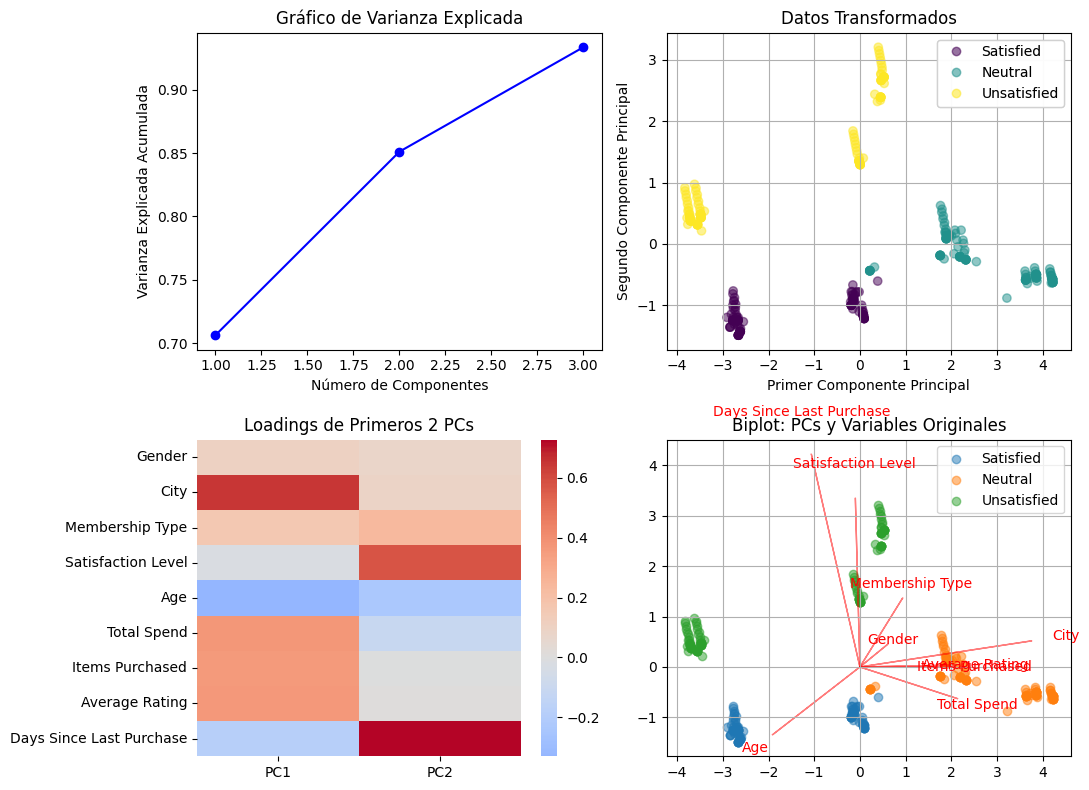

In [ ]:
def visualize_and_evaluate_pca(X_pca, y, target_names, feature_names):
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(11, 8))

    # Varianza explicada
    n_components = len(pca.explained_variance_ratio_)
    axes[0, 0].plot(range(1, n_components + 1),
                    np.cumsum(pca.explained_variance_ratio_), 'bo-')
    axes[0, 0].set_xlabel('Número de Componentes')
    axes[0, 0].set_ylabel('Varianza Explicada Acumulada')
    axes[0, 0].set_title('Gráfico de Varianza Explicada')

    # Scatter plot de primeros dos componentes
    if X_pca.shape[1] >= 2:
        scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, cmap='viridis')
        axes[0, 1].set_xlabel('Primer Componente Principal')
        axes[0, 1].set_ylabel('Segundo Componente Principal')
        axes[0, 1].set_title('Datos Transformados')

        # Crear leyenda utilizando target_names
        handles, _ = scatter.legend_elements()
        legend_labels = [target_names[int(i)] for i in np.unique(y)]
        legend = axes[0, 1].legend(handles, legend_labels)
        axes[0, 1].add_artist(legend)
    axes[0, 1].grid(True)

    # Loadings (coeficientes) para primeras dos componentes
    loadings = pca.components_[:2].T
    loading_matrix = pd.DataFrame(
        loadings,
        columns=['PC1', 'PC2'],
        index=feature_names
    )
    sns.heatmap(loading_matrix, cmap='coolwarm', center=0, ax=axes[1,0])
    axes[1, 0].set_title('Loadings de Primeros 2 PCs')

    # Biplot
    # Normalizar loadings para visualización
    n_features = len(feature_names)
    scaling = np.max(np.abs(X_pca[:, :2]))/np.max(np.abs(loadings))

    for i, target_name in zip(np.unique(y), target_names):
        axes[1, 1].scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                           alpha=0.5, label=target_name)

    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        axes[1, 1].arrow(0, 0, x*scaling, y*scaling, color='r', alpha=0.5)
        axes[1, 1].text(x*scaling*1.2, y*scaling*1.2, feature_names[i],
                      color='r', ha='center', va='center')

    axes[1, 1].set_title('Biplot: PCs y Variables Originales')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

visualize_and_evaluate_pca(X_pca, y, target_names=target_names, feature_names=list(categorical_cols) + list(numeric_cols))

La imagen presenta un análisis completo de PCA (Análisis de Componentes Principales) con cuatro gráficos complementarios que analizan datos de clientes, posiblemente de un negocio minorista o servicio de suscripción.

**Descripción de los gráficos**

1. Gráfico de Varianza Explicada (superior izquierda)

  - Muestra la varianza acumulada explicada por los componentes principales.
  - Con 1 componente: ~70% de varianza explicada.
  - Con 2 componentes: ~85% de varianza explicada.
  - Con 3 componentes: ~95% de varianza explicada.

2. Datos Transformados (superior derecha)

  - Visualiza los datos proyectados en los dos primeros componentes principales.
Tres grupos claramente separados por nivel de satisfacción:

    - Satisfied (satisfechos): ubicados principalmente en el cuadrante inferior izquierdo.
    - Neutral: distribuidos en la parte central y derecha.
    - Unsatisfied (insatisfechos): concentrados en dos grupos en el lado izquierdo con valores positivos en el PC2.

3. Loadings de Primeros 2 PCs (inferior izquierda)

  - Mapa de calor que muestra la contribución de cada variable original a los componentes principales.
  - Variables con mayor influencia en PC1: City (ciudad) e Items Purchased (artículos comprados).
  - Variables con mayor influencia en PC2: Days Since Last Purchase (días desde última compra) y Satisfaction Level (nivel de satisfacción).

4. Biplot: PCs y Variables Originales (inferior derecha)

  - Combina la proyección de datos con la dirección e intensidad de las variables originales.
  - Los vectores rojos indican la dirección de cada variable en el espacio de los componentes.
  - Muestra la misma segmentación por nivel de satisfacción con código de colores.
  - Los vectores de las variables apuntan hacia las características dominantes de cada grupo.

**Insights relevantes**

- Segmentación clara de clientes: El análisis PCA ha identificado tres grupos bien definidos de clientes basados en su nivel de satisfacción, con diferentes características en términos de comportamiento de compra y demografía.
Determinantes de satisfacción:

- Los clientes satisfechos (azul) se asocian con mayor edad, mayor gasto total y calificaciones más altas.

- Los clientes insatisfechos (verde) se caracterizan por mayor tiempo desde la última compra y están más influenciados por el tipo de membresía.
Los clientes neutrales (naranja) tienen mayor variabilidad y se asocian con la ubicación (City) y el género.

- Importancia de la recencia: "Days Since Last Purchase" tiene una carga muy fuerte en el segundo componente y aparece como un determinante clave de la insatisfacción. Esto sugiere que los clientes que no han comprado recientemente tienden a estar más insatisfechos.

- Eficiencia del modelo PCA: Con solo dos componentes se logra explicar aproximadamente el 85% de la variabilidad de los datos, lo que indica que el PCA ha logrado una reducción dimensional eficiente.
Oportunidades de acción:

- Retención: Enfocarse en reducir el tiempo entre compras para evitar la migración hacia la insatisfacción.

- Segmentación estratégica: Adaptar ofertas según el tipo de membresía para el grupo de clientes insatisfechos.

- Personalización geográfica: La variable "City" muestra una influencia importante, sugiriendo la necesidad de estrategias específicas por ubicación.

- Correlaciones reveladas: El biplot muestra que variables como "Total Spend" y "Average Rating" están muy correlacionadas (vectores en dirección similar), mientras que "Days Since Last Purchase" y "Satisfaction Level" tienen una correlación negativa (direcciones opuestas).

- Aplicación práctica: Este análisis proporciona bases sólidas para implementar estrategias de marketing personalizadas, programas de fidelización específicos y campañas de recuperación de clientes enfocadas en los factores más relevantes para cada segmento.

In [ ]:
# Visualización en 3D
X_pca, pca = perform_pca(X, n_components=3)

def visualize_3d(X_pca):
    pc_transformation = pd.DataFrame(data=X_pca,
                                     columns = ['PC1', 'PC2', 'PC3'])
    pc_transformation['Satisfaction Level'] = pd.Categorical(df.dropna()['Satisfaction Level'])
    pc_transformation['size'] = 10

    fig = px.scatter_3d(pc_transformation, x='PC1', y='PC2', z='PC3',
                  color='Satisfaction Level', size='size', size_max=10)
    fig.show()

visualize_3d(X_pca)

## **5. Análisis t-SNE**
Aplicaremos t-SNE para reducir el numero de variables a dos y tres dimensiones para visualizar de mejor manera los clientes por nivel de satisfacción.

In [ ]:
def perform_tsne(X, perplexity=30, n_dimensions=2):
    """
    Realiza t-SNE sobre los datos
    """
    # Aplicar t-SNE
    tsne = TSNE(n_components=n_dimensions, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    return X_tsne

# Realizar t-SNE
X_tsne = perform_tsne(X)

### **5.1 Visualización de Resultados t-SNE**

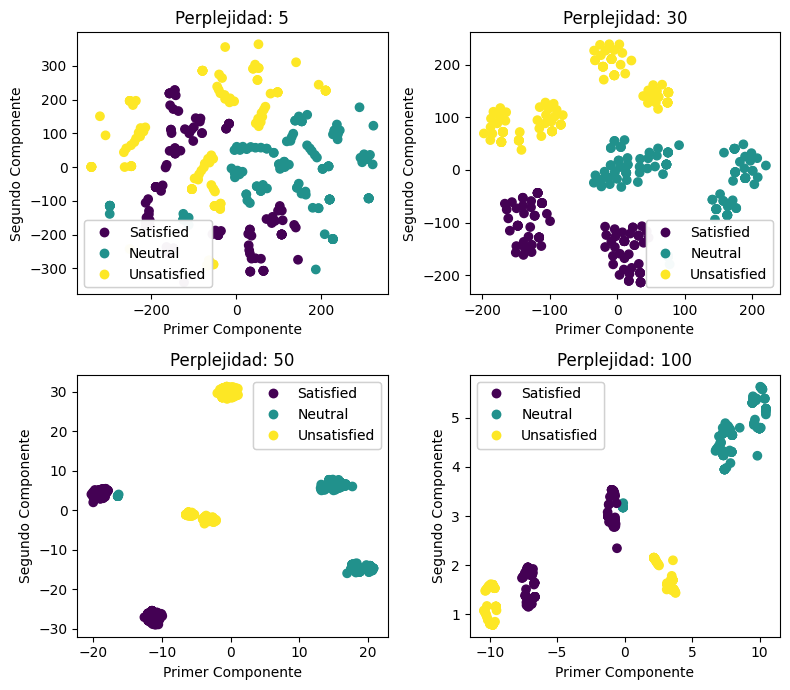

In [ ]:
# Comparar valores de perplejidad
def compare_perplexities(X, y, target_names, perplexities=[5, 30, 50, 100]):
    fig, axes = plt.subplots(2, 2, figsize=(8, 7))
    axes = axes.ravel()

    for idx, perp in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
        X_tsne = tsne.fit_transform(X)

        scatter = axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
        axes[idx].set_title(f'Perplejidad: {perp}')
        axes[idx].set_xlabel('Primer Componente')
        axes[idx].set_ylabel('Segundo Componente')

        # Crear leyenda utilizando target_names
        handles, _ = scatter.legend_elements()
        legend_labels = [target_names[int(i)] for i in np.unique(y)]
        legend = axes[idx].legend(handles, legend_labels)
        axes[idx].add_artist(legend)

    plt.tight_layout()
    plt.show()

compare_perplexities(X, y, target_names)

La imagen muestra cuatro visualizaciones de t-SNE (t-Distributed Stochastic Neighbor Embedding) aplicadas a un mismo conjunto de datos de satisfacción de clientes, pero utilizando diferentes valores de perplejidad: 5, 30, 50 y 100.

**Descripción de las visualizaciones**

1. Perplejidad: 5 (superior izquierda)

- Alta granularidad con muchos clusters pequeños y dispersos.
- Considerable superposición entre los tres grupos de satisfacción.
- Estructura local preservada pero sin un patrón global claro.
- Los puntos de cada categoría aparecen fragmentados en múltiples subgrupos.

2. Perplejidad: 30 (superior derecha):

- Mayor cohesión dentro de cada grupo de satisfacción.
- Los clientes insatisfechos (amarillo) se dividen en tres clusters distintos.
- Los clientes neutrales (verde) forman varios grupos con cierta coherencia espacial.
- Los clientes satisfechos (morado) aparecen en dos clusters principales.

3. Perplejidad: 50 (inferior izquierda):

- Separación más definida entre los grupos.
- Estructura más compacta con clusters bien delimitados.
- Escala de valores más reducida en los ejes.
- Cada nivel de satisfacción forma grupos claramente diferenciados con mínima superposición.

4. Perplejidad: 100 (inferior derecha):

- Máxima simplificación con clusters muy compactos.
- Escala de valores aún más reducida.
- Clara separación entre grupos con estructura global muy definida.
- Los neutrales (verde) aparecen más dispersos que los otros grupos.

**Insights relevantes**

- Impacto del parámetro de perplejidad: la visualización demuestra cómo un mismo conjunto de datos puede revelar diferentes patrones dependiendo del equilibrio entre estructura local y global que determina la perplejidad en t-SNE.

- Balanceo óptimo: la perplejidad 50 parece ofrecer el mejor equilibrio para este conjunto de datos, mostrando tanto separación clara entre grupos como coherencia interna dentro de cada nivel de satisfacción.

- Segmentación de clientes insatisfechos: en las perplejidades medias (30 y 50), los clientes insatisfechos muestran una tendencia consistente a formar múltiples subgrupos, lo que sugiere que existen diferentes perfiles o causas de insatisfacción que merecen estrategias diferenciadas.

- Comportamiento de clientes neutrales: los clientes neutrales (verde) muestran mayor dispersión en todas las configuraciones, lo que indica mayor heterogeneidad en este grupo. Esta observación sugiere que el grupo "neutral" puede incluir clientes con características muy diversas.

- Aplicaciones prácticas

  - Para exploración inicial de datos: perplejidad baja (5) ayuda a identificar micro-patrones y anomalías.
  - Para comunicación ejecutiva: perplejidad alta (100) ofrece una visión clara y simplificada.
  - Para segmentación de marketing: perplejidad media (30-50) proporciona el mejor balance entre detalle y estructura.


- Recomendaciones analíticas

  - Explorar los diferentes subgrupos dentro de cada nivel de satisfacción, especialmente los múltiples clusters de clientes insatisfechos.
  - Utilizar la visualización con perplejidad 50 como base para una segmentación más detallada y desarrollo de estrategias específicas.
  - Combinar estos resultados con análisis de variables originales para identificar los factores determinantes de cada cluster.


- Limitación metodológica: las diferentes escalas en los ejes entre visualizaciones dificultan la comparación directa, lo que refuerza la importancia de considerar múltiples configuraciones de parámetros al interpretar resultados de t-SNE.

In [ ]:
# Visualización en 3D
X_tsne = perform_tsne(X, n_dimensions=3)

def visualize_3d(X_tsne):
    pc_transformation = pd.DataFrame(data=X_tsne,
                                     columns = ['Dim1', 'Dim2', 'Dim3'])
    pc_transformation['Satisfaction Level'] = pd.Categorical(df.dropna()['Satisfaction Level'])
    pc_transformation['size'] = 10

    fig = px.scatter_3d(pc_transformation, x='Dim1', y='Dim2', z='Dim3',
                  color='Satisfaction Level', size='size', size_max=10)
    fig.show()

visualize_3d(X_tsne)